# Predictive Analytics in Marketing Campaigns Using Machine Learning

# Introduction

### Import Libraries

In [ ]:
# libraries for data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import datetime
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# libraries for visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

# libraries for data modelling
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries for model evaluation
import sklearn.metrics as metrics

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Gama/marketing_campaign.csv', sep=';')


In [ ]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [ ]:
# Number of rows and columns in the dataset
print("There are ", df.shape[0], 'rows and ', df.shape[1], 'columns')

There are  2240 rows and  29 columns


In [ ]:
# Display the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Print the summary of the dataset
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
# Data type of each column in the dataset
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Data Preparation

### Missing Data

In [ ]:
# Number of missing values in each column
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Deleting the rows with missing values will not have any sigfinicant effect on the quality of the dataset as there are only 24 missing rows. Hence, the rows are dropped.

In [ ]:
df = df.dropna()

### Outliers

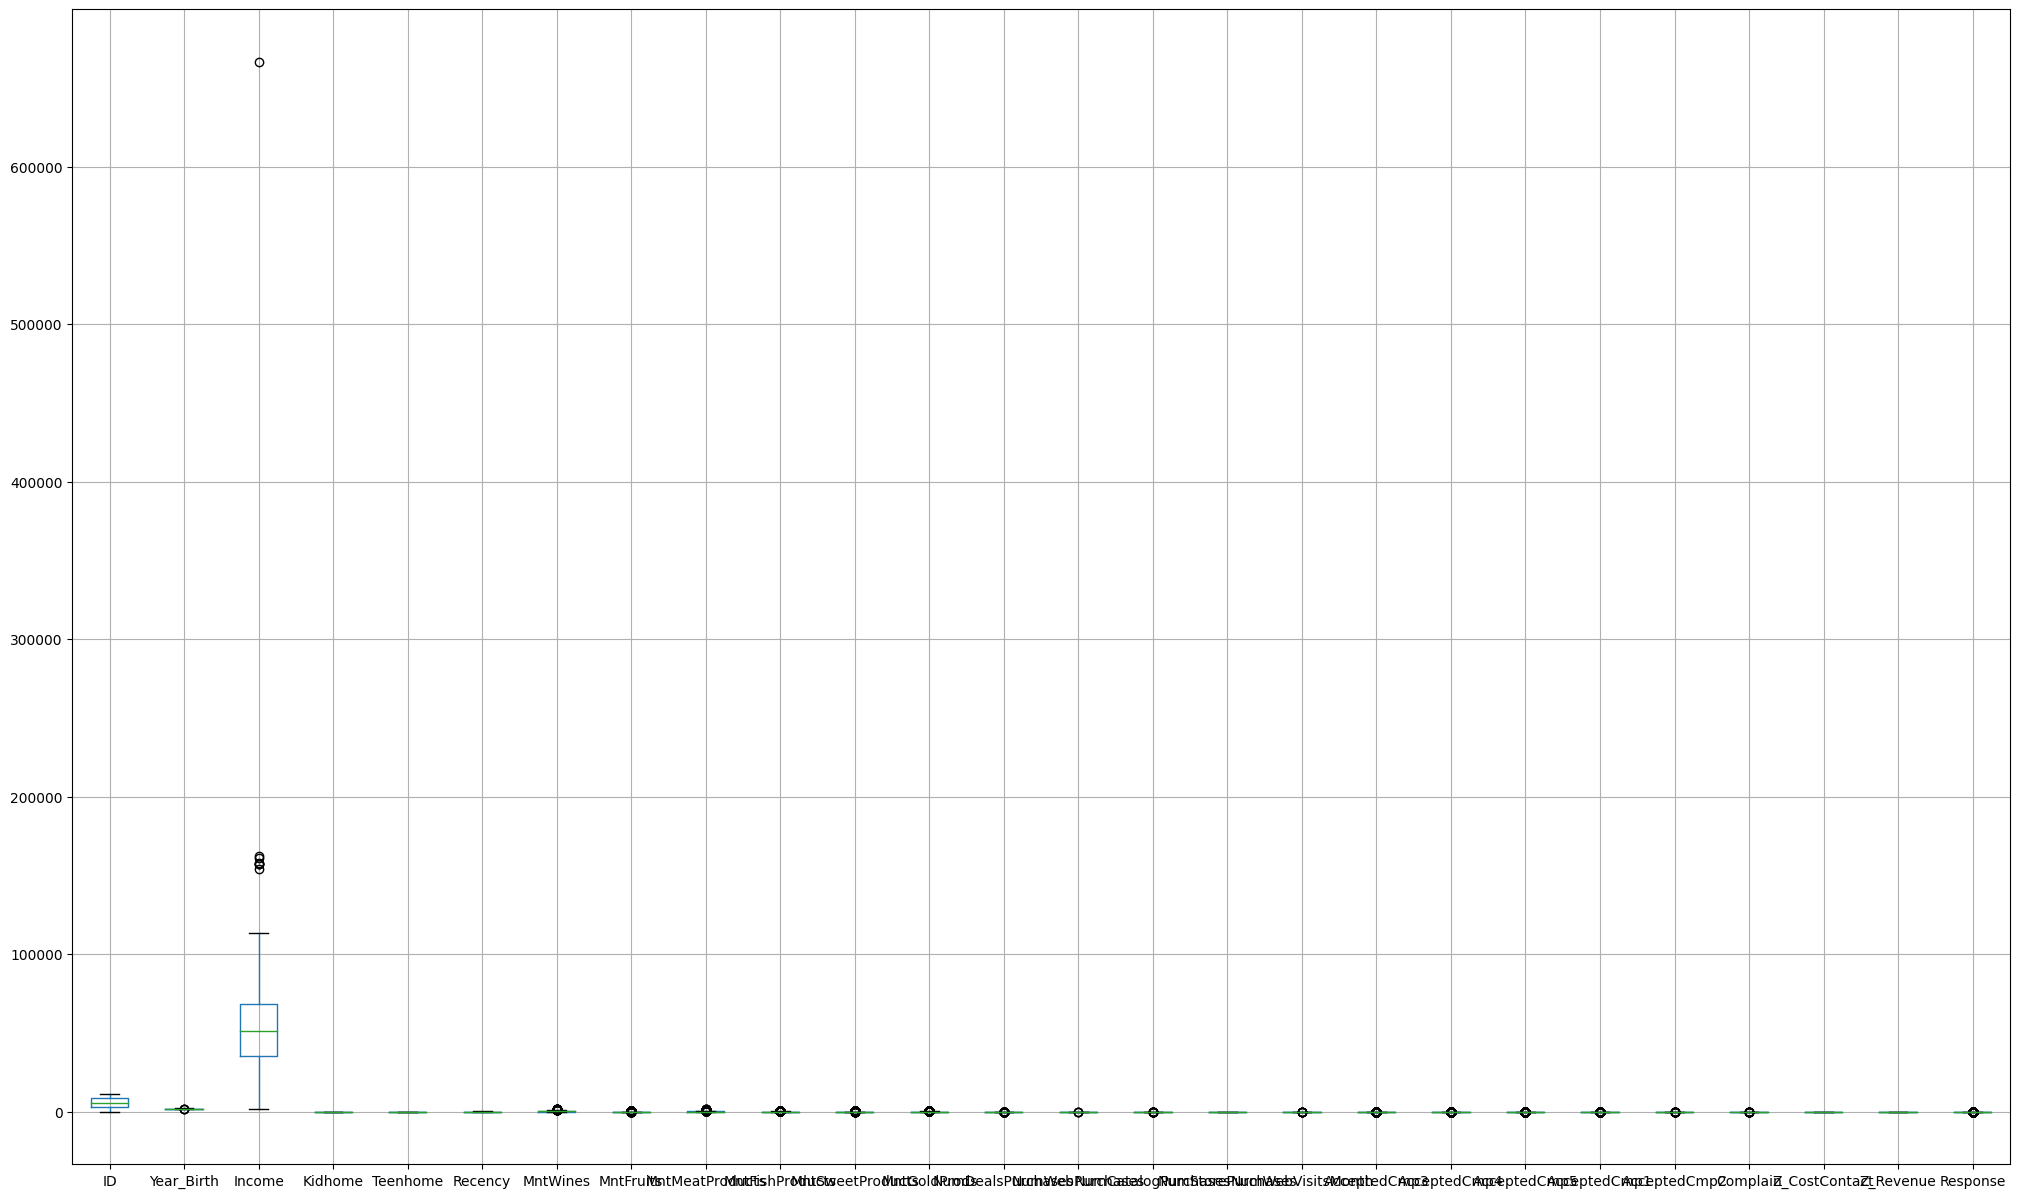

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(25, 15))

# Plot the box plots for all columns
df.boxplot(ax=ax)

# Show the plot
plt.show()

The income column appears to have a significant outlier. Consequently, it can be treated first.

In [ ]:
# Define a function that finds and drops outliers for a specific column

def treat_outliers(column, df):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Identify the outliers in the Income column
  outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

  # Remove the outliers in the Income column
  df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

  return df

In [ ]:
# Remove the outliers in the Income column
df = treat_outliers('Income', df)

In [ ]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2208, 29)


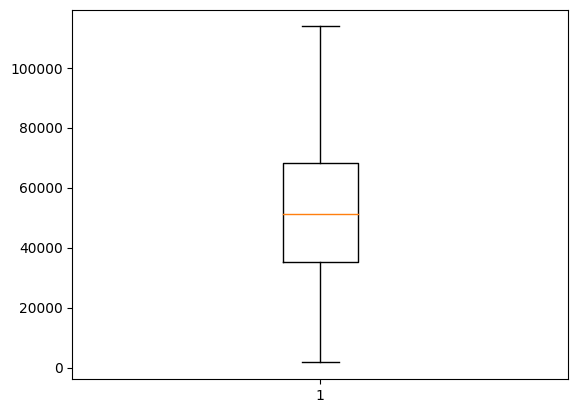

In [ ]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

# Feature engineering

### Creating Age

In [ ]:
year = datetime.date.today().year


df['Age'] = year - df['Year_Birth']


In [ ]:
df['Age'].describe()

count    2208.000000
mean       55.192935
std        11.991913
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [ ]:
# now we can drop year_birth and id as they are no longer needed

df.drop(columns = ['ID','Year_Birth'], inplace = True)

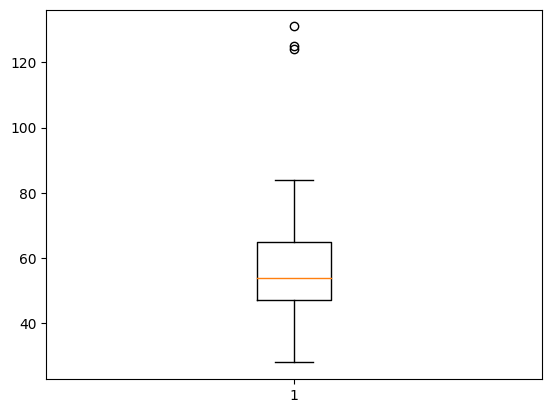

In [ ]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Age'])
plt.show()


In [ ]:
# Remove the outliers in the Income column
df = treat_outliers('Age', df)

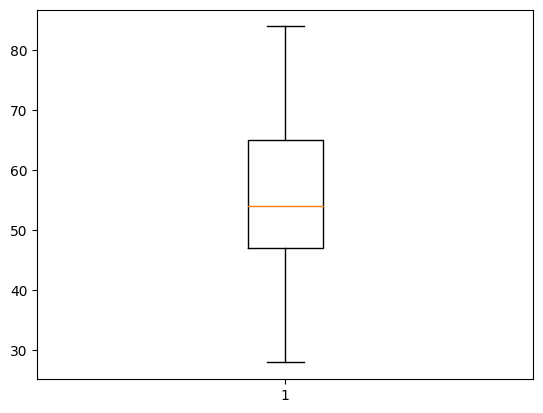

In [ ]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Age'])
plt.show()


### Children Home

In [ ]:
# create a new variable to get the number of children in the household
df['childrenHome'] = df['Teenhome'] + df['Kidhome']
df['childrenHome'].value_counts()

childrenHome
1    1112
0     628
2     415
3      50
Name: count, dtype: int64

In [ ]:
# now we drop teenhome and kidhome
df.drop(columns = ['Teenhome','Kidhome'], inplace = True)

In [ ]:
# get if at least one of the campaigns was successful

df['success'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] +df['Response']

def campaign_success(value):
    if value == 0:
        return 0
    else:
        return 1

df['success'] = df['success'].apply(campaign_success)

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
def marital_status(status):
    if status == 'Alone' or status == 'Absurd' or status == 'YOLO':
        return 'Single'
    elif status == 'Together' or status == 'Married':
        return 'In a Relationship'
    else:
        return status

df['Marital_Status'] = df['Marital_Status'].apply(marital_status)

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
In a Relationship    1422
Single                477
Divorced              230
Widow                  76
Name: count, dtype: int64

In [ ]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2205, 28)


In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
In a Relationship    1422
Single                477
Divorced              230
Widow                  76
Name: count, dtype: int64

In [ ]:
df['Education'].value_counts()

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [ ]:
def education(level):
    if level == 'Graduation':
        return 'Graduate'
    elif level == '2n Cycle' or level =='Basic':
        return 'Basic'
    else:
        return 'Post Grad'

In [ ]:
df['Education'] = df['Education'].apply(education)

In [ ]:
df['Education'].value_counts()

Education
Graduate     1113
Post Grad     840
Basic         252
Name: count, dtype: int64

In [ ]:
campaign = df[['Age','Education','Marital_Status','childrenHome','NumWebVisitsMonth','success',]]

In [ ]:
campaign

Age  Education     Marital_Status  childrenHome  NumWebVisitsMonth  \
0      67   Graduate             Single             0                  7   
1      70   Graduate             Single             2                  5   
2      59   Graduate  In a Relationship             0                  4   
3      40   Graduate  In a Relationship             1                  6   
4      43  Post Grad  In a Relationship             1                  5   
...   ...        ...                ...           ...                ...   
2235   57   Graduate  In a Relationship             1                  5   
2236   78  Post Grad  In a Relationship             3                  7   
2237   43   Graduate           Divorced             0                  6   
2238   68  Post Grad  In a Relationship             1                  3   
2239   70  Post Grad  In a Relationship             2                  7   

      success  
0           1  
1           0  
2           0  
3           0  
4           0  
...       ...  
2235        0  
2236        1  
2237        1  
2238        0  
2239        1  

[2205 rows x 6 columns]

In [ ]:
campaign = pd.get_dummies(campaign, drop_first=True)

In [ ]:
campaign['success'].value_counts(normalize = True)

success
0    0.726077
1    0.273923
Name: proportion, dtype: float64

<Axes: ylabel='count'>

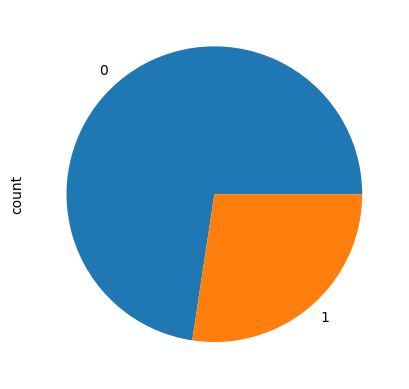

In [ ]:
campaign["success"].value_counts(dropna=False).plot(kind="pie")

<Axes: ylabel='count'>

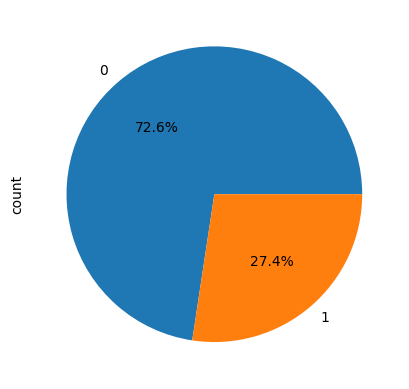

In [ ]:
campaign["success"].value_counts(dropna=False).plot.pie(autopct='%1.1f%%', labels=['0', '1'])

# Data Modelling

## Without Data Balancing

In [ ]:
#Define the target variable
y = campaign['success']

#Define the predictor variables
x = campaign.copy()
x.drop(columns = 'success', inplace = True)

In [ ]:
#  split data for traning and testing
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = 0.3, random_state=123)

### Naive Bayes

#### Modelling

In [ ]:
import random

def set_random_seed(seed=0):
  np.random.seed(seed)
  random.seed(seed)

set_random_seed(0)

#fit the model
ex1_gnb = GaussianNB()
ex1_gnb.fit(x1_train,y1_train)

GaussianNB()

#### Prediction

In [ ]:
exp1_nb_pred = ex1_gnb.predict(x1_test)

#### Evaluation

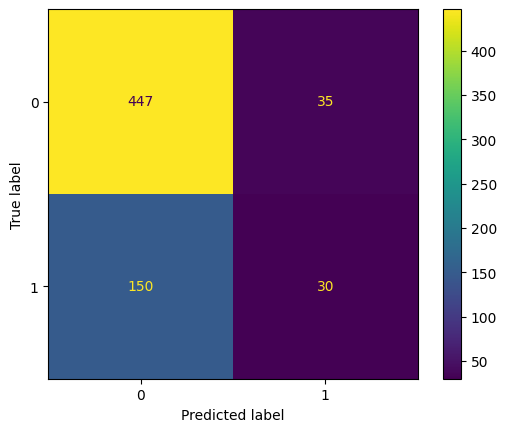

In [ ]:
cm = confusion_matrix(y1_test,exp1_nb_pred,labels  = ex1_gnb.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
accruacy = accuracy_score(y1_test,exp1_nb_pred)*100
precision = precision_score(y1_test,exp1_nb_pred)*100
recall = recall_score(y1_test,exp1_nb_pred)*100
f1 = f1_score(y1_test,exp1_nb_pred)*100
gnb_auc = roc_auc_score(y1_test, exp1_nb_pred)*100

print("Accuracy:", "%.3f" % accruacy)
print("Precision:", "%.3f" % precision)
print("Recall:", "%.3f" % recall)
print("F1 Score:", "%.3f" % f1)
print("ROC AUC", "%.3f" % gnb_auc)

Accuracy: 72.054
Precision: 46.154
Recall: 16.667
F1 Score: 24.490
ROC AUC 54.703


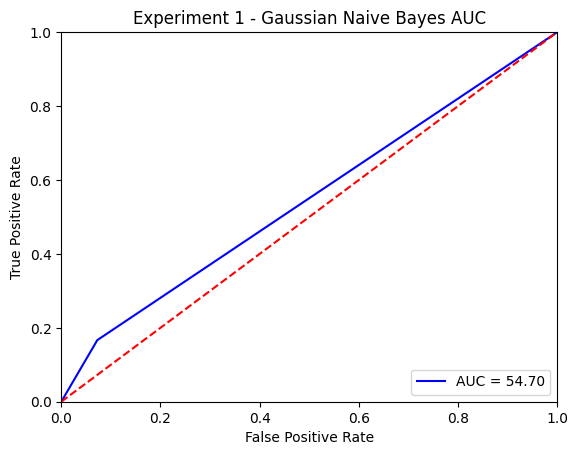

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y1_test, exp1_nb_pred)
exp1_nb_auc = metrics.auc(fpr, tpr)*100

plt.title('Experiment 1 - Gaussian Naive Bayes AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % exp1_nb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

#### Modelling

In [ ]:
exp1_dt = DecisionTreeClassifier(random_state=456)
exp1_dt.fit(x1_train, y1_train)

DecisionTreeClassifier(random_state=456)

#### Prediction

In [ ]:
exp1_dt_pred = exp1_dt.predict(x1_test)

#### Evaluation

In [ ]:
accruacy = accuracy_score(y1_test,exp1_dt_pred)*100
precision = precision_score(y1_test,exp1_dt_pred)*100
recall = recall_score(y1_test,exp1_dt_pred)*100
f1 = f1_score(y1_test,exp1_dt_pred)*100
dt_auc = roc_auc_score(y1_test, exp1_dt_pred)*100

print("Accuracy:", "%.3f" % accruacy)
print("Precision:", "%.3f" % precision)
print("Recall:", "%.3f" % recall)
print("F1 Score:", "%.3f" % f1)
print("ROC AUC", "%.3f" % gnb_auc)

Accuracy: 68.429
Precision: 42.162
Recall: 43.333
F1 Score: 42.740
ROC AUC 54.703


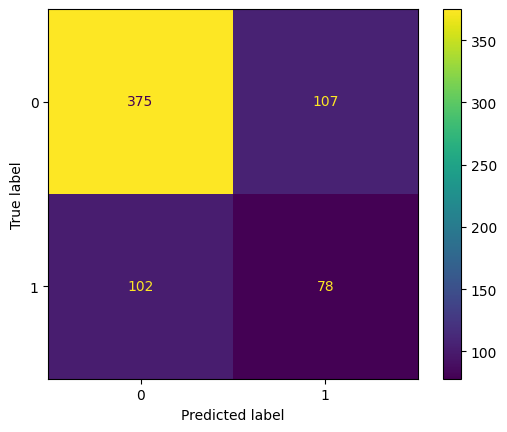

In [ ]:
#configure_plotly_browser_state()
cm = confusion_matrix(y1_test,exp1_dt_pred,labels  = exp1_dt.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

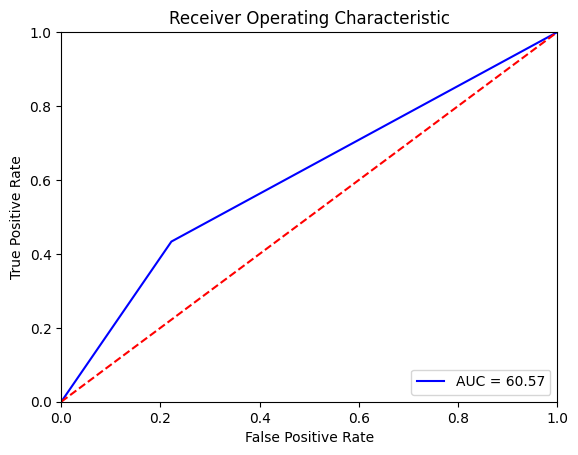

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y1_test, exp1_dt_pred)
exp1_dt_auc = metrics.auc(fpr, tpr)*100

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % exp1_dt_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## With Data Balancing

### Balancing the dataset

In [ ]:
#Define the target variable
y = campaign['success']

#Define the predictor variables
x = campaign.copy()
x.drop(columns = 'success', inplace = True)

In [ ]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 1601, 1: 604})


In [ ]:
ros = RandomOverSampler(random_state=123)
x_res, y_res = ros.fit_resample(x, y)

In [ ]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1601, 0: 1601})


<Axes: ylabel='count'>

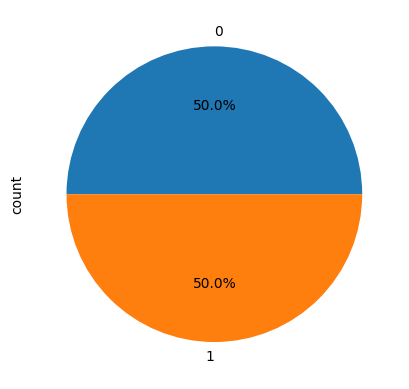

In [ ]:
y_res.value_counts(dropna=False).plot.pie(autopct='%1.1f%%', labels=['0', '1'])

### Naive Bayes

#### Modelling

In [ ]:
#  split data for traning and testing
x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size = .3, random_state=123)

In [ ]:
#fit the model
set_random_seed(0)
exp2_gnb = GaussianNB()
exp2_gnb.fit(x2_train,y2_train)

GaussianNB()

#### Prediction

In [ ]:
exp2_nb_pred = exp2_gnb.predict(x2_test)

#### Evaluation

In [ ]:
accruacy = accuracy_score(y2_test,exp2_nb_pred)*100
precision = precision_score(y2_test,exp2_nb_pred)*100
recall = recall_score(y2_test,exp2_nb_pred)*100
f1 = f1_score(y2_test,exp2_nb_pred)*100
gnb_auc = roc_auc_score(y2_test, exp2_nb_pred)*100

print("Accuracy:", "%.2f" % accruacy)
print("Precision:", "%.2f" % precision)
print("Recall:", "%.2f" % recall)
print("F1 Score:", "%.2f" % f1)
print("ROC AUC", "%.2f" % gnb_auc)

Accuracy: 60.77
Precision: 61.38
Recall: 51.50
F1 Score: 56.01
ROC AUC 60.50


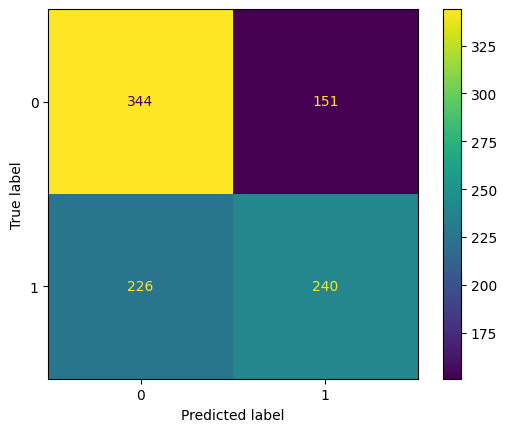

In [ ]:
#configure_plotly_browser_state()
cm = confusion_matrix(y2_test,exp2_nb_pred,labels  = exp2_gnb.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

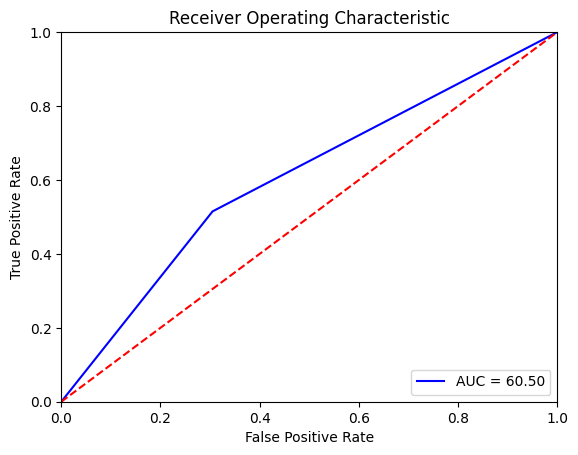

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y2_test, exp2_nb_pred)
exp2_nb_auc = metrics.auc(fpr, tpr)*100

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % exp2_nb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# evaluates a decision tree model on the imbalanced dataset
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Decision Tree

#### Modelling

In [ ]:
#  split data for traning and testing with resampled data
x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size = .3, random_state=123)

In [ ]:
exp2_dt = DecisionTreeClassifier(random_state=456)
exp2_dt.fit(x2_train, y2_train)

DecisionTreeClassifier(random_state=456)

#### Prediction

In [ ]:
exp2_dt_pred = exp2_dt.predict(x2_test)

#### Evaluation

In [ ]:
accruacy = accuracy_score(y2_test,exp2_dt_pred)*100
precision = precision_score(y2_test,exp2_dt_pred)*100
recall = recall_score(y2_test,exp2_dt_pred)*100
f1 = f1_score(y2_test,exp2_dt_pred)*100
gnb_auc = roc_auc_score(y2_test, exp2_dt_pred)*100

print("Accuracy:", "%.2f" % accruacy)
print("Precision:", "%.2f" % precision)
print("Recall:", "%.2f" % recall)
print("F1 Score:", "%.2f" % f1)
print("ROC AUC", "%.2f" % gnb_auc)

Accuracy: 78.77
Precision: 74.35
Recall: 85.84
F1 Score: 79.68
ROC AUC 78.98


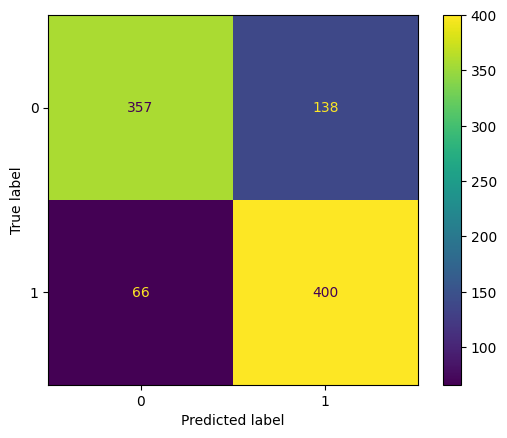

In [ ]:
#configure_plotly_browser_state()
cm = confusion_matrix(y2_test,exp2_dt_pred,labels  = exp2_dt.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

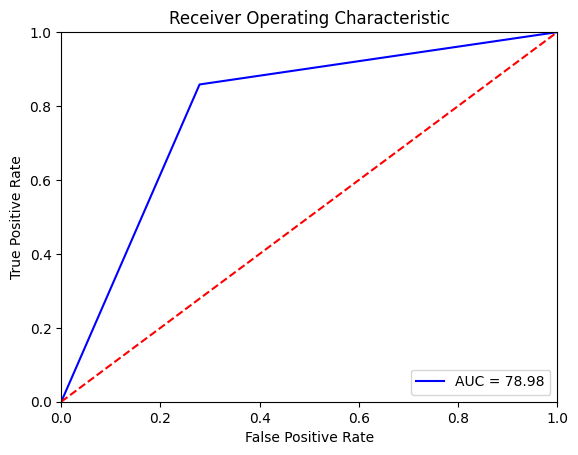

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y2_test, exp2_dt_pred)
exp2_dt_auc = metrics.auc(fpr, tpr)*100

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % exp2_dt_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## With Data Balancing & Scaling

### Balancing the dataset

In [ ]:
#Define the target variable
y = campaign['success']

#Define the predictor variables
x = campaign.copy()
x.drop(columns = 'success', inplace = True)

In [ ]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 1601, 1: 604})


In [ ]:
ros = RandomOverSampler(random_state=123)
x_res, y_res = ros.fit_resample(x, y)

In [ ]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1601, 0: 1601})


### Scaling the Dataset using MinMax Scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_res)
x_scaled = scaler.transform(x_res)

### Naive Bayes

#### Modelling

In [ ]:
#  split data for traning and testing
x3_train,x3_test,y3_train,y3_test = train_test_split(x_scaled,y_res,test_size = .3, random_state=123)

In [ ]:
#fit the model
set_random_seed(1)
exp3_gnb = GaussianNB()
exp3_gnb.fit(x3_train,y3_train)

GaussianNB()

#### Prediction

In [ ]:
exp3_nb_pred = exp3_gnb.predict(x3_test)

#### Evaluation

In [ ]:
accuracy = accuracy_score(y3_test,exp3_nb_pred)*100
precision = precision_score(y3_test,exp3_nb_pred)*100
recall = recall_score(y3_test,exp3_nb_pred)*100
f1 = f1_score(y3_test,exp3_nb_pred)*100
gnb_auc = roc_auc_score(y3_test, exp3_nb_pred)*100

print("Accuracy:", "%.2f" % accuracy)
print("Precision:", "%.2f" % precision)
print("Recall:", "%.2f" % recall)
print("F1 Score:", "%.2f" % f1)
print("ROC AUC", "%.2f" % gnb_auc)

Accuracy: 60.77
Precision: 61.38
Recall: 51.50
F1 Score: 56.01
ROC AUC 60.50


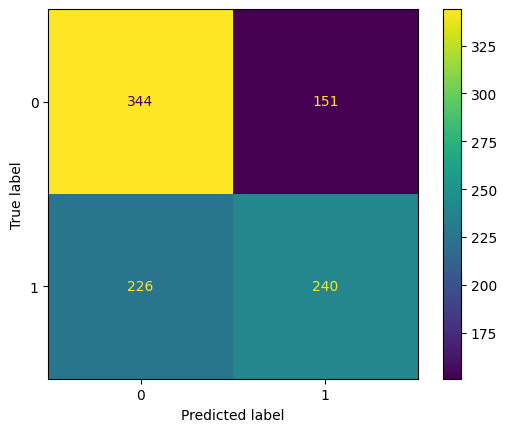

In [ ]:
#configure_plotly_browser_state()
cm = confusion_matrix(y3_test,exp3_nb_pred,labels  = exp3_gnb.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

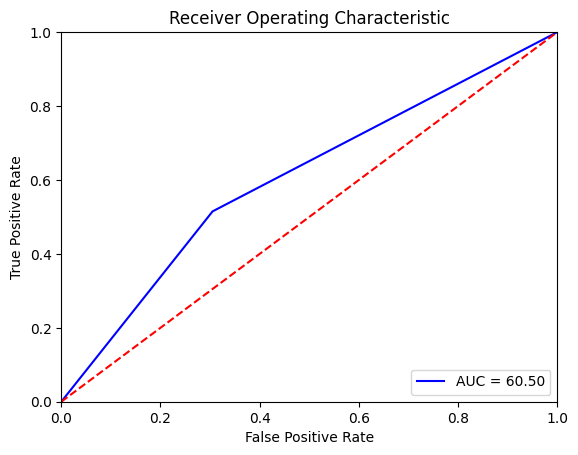

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y3_test, exp3_nb_pred)
exp3_nb_auc = metrics.auc(fpr, tpr)*100

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % exp3_nb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# evaluates a decision tree model on the imbalanced dataset
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Decision Tree

#### Modelling

In [ ]:
#  split data for traning and testing with resampled data
x3_train,x3_test,y3_train,y3_test = train_test_split(x_scaled,y_res,test_size = .3, random_state=123)

In [ ]:
exp3_dt = DecisionTreeClassifier(random_state=456)
exp3_dt.fit(x3_train, y3_train)

DecisionTreeClassifier(random_state=456)

#### Prediction

In [ ]:
exp3_dt_pred = exp3_dt.predict(x3_test)

#### Evaluation

In [ ]:
accruacy = accuracy_score(y3_test,exp3_dt_pred)*100
precision = precision_score(y3_test,exp3_dt_pred)*100
recall = recall_score(y3_test,exp3_dt_pred)*100
f1 = f1_score(y3_test,exp3_dt_pred)*100
gnb_auc = roc_auc_score(y3_test, exp3_dt_pred)*100

print("Accuracy:", "%.2f" % accruacy)
print("Precision:", "%.2f" % precision)
print("Recall:", "%.2f" % recall)
print("F1 Score:", "%.2f" % f1)
print("ROC AUC", "%.2f" % gnb_auc)

Accuracy: 79.08
Precision: 74.77
Recall: 85.84
F1 Score: 79.92
ROC AUC 79.28


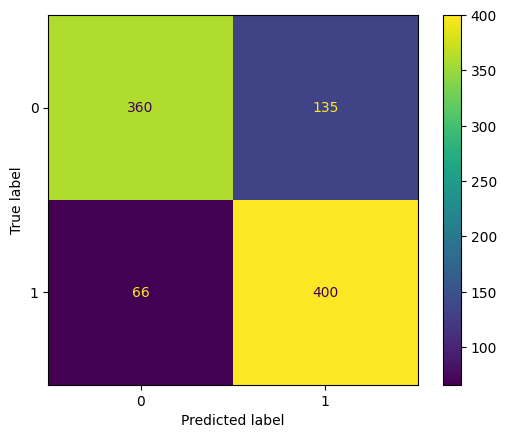

In [ ]:
#configure_plotly_browser_state()
cm = confusion_matrix(y3_test,exp3_dt_pred,labels  = exp3_dt.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

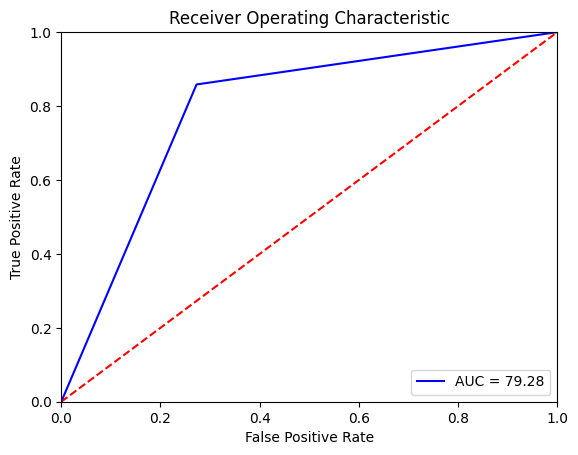

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y3_test, exp3_dt_pred)
exp3_dt_auc = metrics.auc(fpr, tpr)*100

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % exp3_dt_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Comparison of AUC

Text(0.5, 0, 'False Positive Rate')

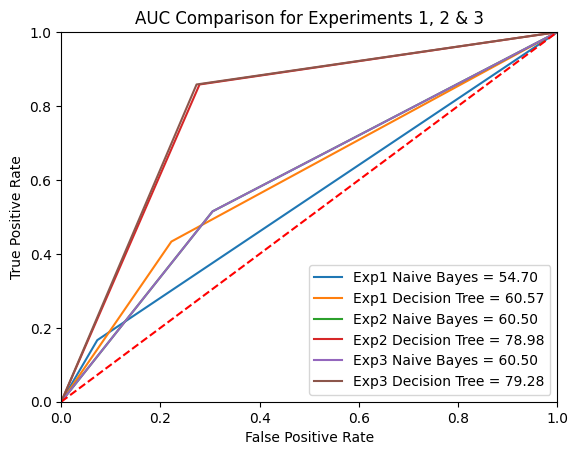

In [ ]:
#set up plotting area
plt.figure(0).clf()

plt.title('AUC Comparison for Experiments 1, 2 & 3')
#Plot Experiment 1 - Naive Bayes

nb1_fpr, nb1_tpr, _ = metrics.roc_curve(y1_test, exp1_nb_pred)
nb1_auc = metrics.roc_auc_score(y1_test, exp1_nb_pred)*100
plt.plot(nb1_fpr,nb1_tpr,label = 'Exp1 Naive Bayes = %0.2f' % nb1_auc)

#Plot Experiment 1 - Decision Tree

dt1_fpr, dt1_tpr, _ = metrics.roc_curve(y1_test, exp1_dt_pred)
dt1_auc = metrics.roc_auc_score(y1_test, exp1_dt_pred)*100
plt.plot(dt1_fpr,dt1_tpr,label = 'Exp1 Decision Tree = %0.2f' % dt1_auc)

#Plot Experiment 2 - Naive Bayes

fpr, tpr, _ = metrics.roc_curve(y2_test, exp2_nb_pred)
auc = metrics.roc_auc_score(y2_test, exp2_nb_pred)*100
plt.plot(fpr,tpr,label = 'Exp2 Naive Bayes = %0.2f' % auc)

#Plot Experiment 2 - Decision Tree

fpr, tpr, _ = metrics.roc_curve(y2_test, exp2_dt_pred)
auc = metrics.roc_auc_score(y2_test, exp2_dt_pred)*100
plt.plot(fpr,tpr,label = 'Exp2 Decision Tree = %0.2f' % auc)

#Plot Experiment 3 - Naive Bayes

fpr, tpr, _ = metrics.roc_curve(y3_test, exp3_nb_pred)
auc = metrics.roc_auc_score(y3_test, exp3_nb_pred)*100
plt.plot(fpr,tpr,label = 'Exp3 Naive Bayes = %0.2f' % auc)

#Plot Experiment 3 - Decision Tree

dt3_fpr, dt3_tpr, _ = metrics.roc_curve(y3_test, exp3_dt_pred)
dt3_auc = metrics.roc_auc_score(y3_test, exp3_dt_pred)*100
plt.plot(dt3_fpr,dt3_tpr,label = 'Exp3 Decision Tree = %0.2f' % dt3_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')